In [1]:
from datetime import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

import datajoint as dj
from pipeline import reference, subject, acquisition, stimulation #, behavior, ephys, action
from pipeline.helper_functions import parse_prefix

Connecting root@127.0.0.1:3306


Display the schema diagram of the entire data pipeline

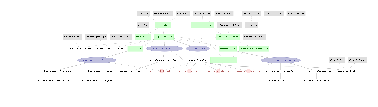

In [2]:
core_erd = dj.ERD(reference) + dj.ERD(subject) + dj.ERD(acquisition) + dj.ERD(stimulation)
core_erd.draw()

Query raw whole-cell recording

In [10]:
subject.Subject()

subject_id id of the subject (e.g. ANM244028),species,strain,"animal_source source of the animal, Jax, Charles River etc.",sex,date_of_birth,subject_description
ANM300476,Mus musculus,B6,Jackson,M,2015-03-28,"Animal Strain: B6;129P2-Pvalbtm1(cre)Arbr/J, B6;129S-Gt(ROSA)26Sortm32(CAG-COP4*H134R/EYFP)Hze/J; Animal source: Jackson, Jackson; Date of birth: 2015-03-28"
ANM322808,Mus musculus,B6,Jackson,M,2015-09-16,Animal Strain: VGAT-ChR2-EYFP; Animal source: Jackson; Date of birth: 2015-09-16
ANM323951,Mus musculus,B6,Jackson,M,2015-09-28,"Animal Strain: B6;129P2-Pvalbtm1(cre)Arbr/J, B6;129S-Gt(ROSA)26Sortm32(CAG-COP4*H134R/EYFP)Hze/J; Animal source: Jackson, Jackson; Date of birth: 2015-09-28"
ANM323952,Mus musculus,B6,Jackson,M,2015-09-28,"Animal Strain: B6;129P2-Pvalbtm1(cre)Arbr/J, B6;129S-Gt(ROSA)26Sortm32(CAG-COP4*H134R/EYFP)Hze/J; Animal source: Jackson, Jackson; Date of birth: 2015-09-28"
ANM323953,Mus musculus,B6,Jackson,M,2015-09-28,"Animal Strain: B6;129P2-Pvalbtm1(cre)Arbr/J, B6;129S-Gt(ROSA)26Sortm32(CAG-COP4*H134R/EYFP)Hze/J; Animal source: Jackson, Jackson; Date of birth: 2015-09-28"
ANM324791,Mus musculus,B6,Jackson,M,2015-10-05,Animal Strain: VGAT-ChR2-EYFP; Animal source: Jackson; Date of birth: 2015-10-05
ANM324792,Mus musculus,B6,Jackson,M,2015-10-05,Animal Strain: VGAT-ChR2-EYFP; Animal source: Jackson; Date of birth: 2015-10-05


In [11]:
acquisition.Cell & 'subject_id = "ANM300476"'

subject_id id of the subject (e.g. ANM244028),session_time session time,cell_id a string identifying the cell in which this intracellular recording is concerning,cell_type,brain_region,brain_subregion,cortical_layer layer within cortex,hemisphere,coordinate_ref,"coordinate_ap in mm, anterior positive, posterior negative","coordinate_ml in mm, always postive, number larger when more lateral","coordinate_dv in mm, always postive, number larger when more ventral (deeper)",device_name
ANM300476,2017-05-20 18:28:59,cell_20_1,N/A,ALM,N/A,N/A,left,bregma,3,2,0,Multiclamp_700B
ANM300476,2017-05-20 18:42:55,cell_22_1,N/A,ALM,N/A,N/A,left,bregma,3,2,0,Multiclamp_700B
ANM300476,2017-05-20 18:43:57,cell_23_1,N/A,ALM,N/A,N/A,left,bregma,3,2,0,Multiclamp_700B
ANM300476,2017-05-20 18:44:45,cell_25_1,N/A,ALM,N/A,N/A,left,bregma,3,2,1,Multiclamp_700B


In [20]:
sess_keys = acquisition.Session.fetch(dj.key)
acquisition.Session()

subject_id id of the subject (e.g. ANM244028),session_time session time,session_directory,session_note
ANM300476,2017-05-20 18:28:59,,ALM whole cell recording during M1 photoinhibition
ANM300476,2017-05-20 18:42:55,,ALM whole cell recording during M1 photoinhibition
ANM300476,2017-05-20 18:43:57,,ALM whole cell recording during M1 photoinhibition
ANM300476,2017-05-20 18:44:45,,ALM whole cell recording during M1 photoinhibition
ANM322808,2017-05-20 19:27:14,,ALM whole cell recording during thalamus photoinhibition
ANM322808,2017-05-20 19:32:33,,ALM whole cell recording during thalamus photoinhibition
ANM323951,2017-05-20 18:54:17,,ALM whole cell recording during M1 photoinhibition


In [4]:
sess_key = sess_keys[0]
print(sess_key)

{'subject_id': 'ANM300476', 'session_time': datetime.datetime(2017, 5, 20, 18, 28, 59)}


In [5]:
cell_key = (acquisition.Cell & sess_key).fetch1(dj.key)
Vm, Vm_wo_spike, timestamps = (acquisition.IntracellularAcquisition.MembranePotential & cell_key).fetch1(
    'membrane_potential',
    'membrane_potential_wo_spike',
    'membrane_potential_time_stamps')

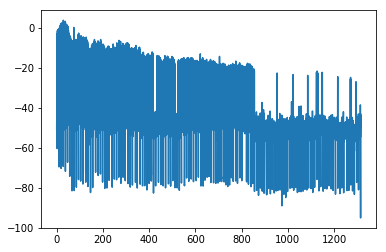

In [6]:
plt.plot(timestamps,Vm)

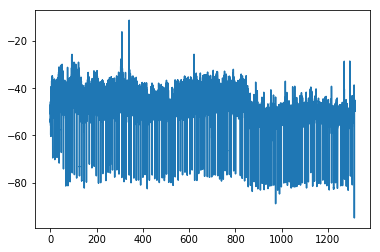

In [7]:
plt.plot(timestamps,Vm_wo_spike)

Photostimulus 

In [8]:
photostim, photostim_timestamps = (acquisition.PhotoStimulation & sess_key).fetch1('photostim_timeseries','photostim_time_stamps')

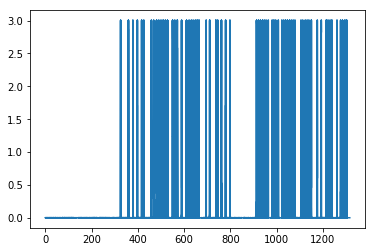

In [9]:
plt.plot(photostim_timestamps,photostim)

In [12]:
current, current_timestamps = (acquisition.IntracellularAcquisition.CurrentInjection & cell_key).fetch1(
    'current_injection',
    'current_injection_time_stamps')

In [17]:
current_timestamps = current_timestamps[0,:]

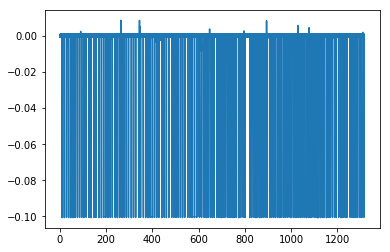

In [18]:
plt.plot(current_timestamps,current)

In [21]:
acquisition.TrialSet.TrialInfo()

subject_id id of the subject (e.g. ANM244028),session_time session time,trial_id unique id of this trial in this trial set,trial_type,trial_response,trial_stim_present is this trial a Stimulation or No stimulation trial,trial_is_good is this a good or bad trial
ANM300476,2017-05-20 18:28:59,Trial_066,lick left,correct,0,1
ANM300476,2017-05-20 18:28:59,Trial_067,lick left,correct,0,1
ANM300476,2017-05-20 18:28:59,Trial_068,lick right,correct,0,1
ANM300476,2017-05-20 18:28:59,Trial_069,lick right,correct,0,1
ANM300476,2017-05-20 18:28:59,Trial_070,lick right,early lick,0,0
ANM300476,2017-05-20 18:28:59,Trial_071,lick left,correct,0,1
ANM300476,2017-05-20 18:28:59,Trial_072,lick left,correct,0,1


In [22]:
acquisition.TrialSet.Trial()

subject_id id of the subject (e.g. ANM244028),session_time session time,trial_id unique id of this trial in this trial set,"cue_start_time cue onset of this trial, with respect to this trial's start time","cue_end_time cue end of this trial, with respect to this trial's start time","pole_in_time the start of sample period for each trial (e.g. the onset of pole motion towards the exploration area), relative to trial start time","pole_out_time the end of the sample period (e.g. the onset of pole motion away from the exploration area), relative to trial start time","start_time start time of this trial, with respect to starting point of this session","stop_time end time of this trial, with respect to starting point of this session"
ANM300476,2017-05-20 18:28:59,Trial_066,17.156,17.256,14.5552,15.9559,13.9836,23.4041
ANM300476,2017-05-20 18:28:59,Trial_067,26.5769,26.6769,23.9759,25.3766,23.4041,32.7011
ANM300476,2017-05-20 18:28:59,Trial_068,35.874,35.9741,33.2731,34.6738,32.7011,42.0741
ANM300476,2017-05-20 18:28:59,Trial_069,45.2469,45.347,42.646,44.0465,42.0741,51.4352
ANM300476,2017-05-20 18:28:59,Trial_070,55.0606,55.1607,52.0071,53.4077,51.4352,61.2331
ANM300476,2017-05-20 18:28:59,Trial_071,64.4059,64.5061,61.8049,63.2056,61.2331,70.6382
ANM300476,2017-05-20 18:28:59,Trial_072,73.811,73.9111,71.2101,72.6108,70.6382,80.0142
